### Student Information
Name: Pei Ling An 安珮綾

Student ID: 110540017

GitHub ID: [Annisme](https://github.com/Annisme)

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [ ]:
### Begin Assignment Here
!pip install jupyter numpy pandas matplotlib plotly nltk scikit-learn seaborn pami umap-learn

In [3]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline


In [24]:
categories = ['notstalgia', 'nostalgia']

In [22]:
from datasets import load_dataset

import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")


In [20]:
print(df.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [62]:
from sklearn.preprocessing import LabelEncoder
categories = ["nostalgia", "not nostalgia"]
label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

categories = ["nostalgia", "not nostalgia"]
train_subset = df[df['sentiment'].isin(categories)].sample(frac=0.8, random_state=42)  # 80% 為訓練集
test_subset = df.drop(train_subset.index)  # 其餘 20% 為測試集

# 檢視訓練集中前兩筆資料
print(train_subset.head(2))

          sentiment                                            comment  \
1116  not nostalgia  Perception of death, birth, sorrow, suffering,...   
1368  not nostalgia  One of those Classic (and there were so many o...   

      encoded_sentiment  
1116                  1  
1368                  1  


In [64]:
train_subset[:2]['comment']

1116    Perception of death, birth, sorrow, suffering,...
1368    One of those Classic (and there were so many o...
Name: comment, dtype: object

In [70]:
unique_categories = df['sentiment'].unique()

print( unique_categories)

['not nostalgia' 'nostalgia']


In [71]:
len(train_subset)

1200

In [74]:
print("\n".join(train_subset.iloc[0]['comment'].splitlines()))

Perception of death, birth, sorrow, suffering, old age


In [79]:
train_subset.iloc[0]['sentiment']

'not nostalgia'

In [78]:
train_subset.iloc[0]['encoded_sentiment']

np.int64(1)

In [81]:
encoded_labels = train_subset.iloc[:10]['encoded_sentiment'].tolist()
print(encoded_labels)

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1]


In [83]:
# 遍歷訓練集中前 10 筆資料並顯示對應的類別名稱
for i in range(10):
    category_name = train_subset.iloc[i]['sentiment']  # 提取類別名稱
    print(f"{category_name}")

not nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia
nostalgia
not nostalgia
not nostalgia
not nostalgia


In [86]:
for text in range(3):
    print(f"資料 {text + 1}：\n{train_subset.iloc[i]['comment']}\n")

資料 1：
 I know the song you're talking about. I'm sure I have it on an album. I moved not long ago so I will have to dig to find it. It ended (as I remember) " I'll always be your baby through out the years" (I think).

資料 2：
 I know the song you're talking about. I'm sure I have it on an album. I moved not long ago so I will have to dig to find it. It ended (as I remember) " I'll always be your baby through out the years" (I think).

資料 3：
 I know the song you're talking about. I'm sure I have it on an album. I moved not long ago so I will have to dig to find it. It ended (as I remember) " I'll always be your baby through out the years" (I think).



In [123]:
import pandas as pd
import data_mining_helpers as dmh

In [129]:
import pandas as pd

# 定義格式化函數
def format_rows(docs):
    """格式化文本字段並去除特殊字符，適用於 DataFrame 格式。"""
    D = []
    for text in docs['comment']:  # 假設 'comment' 是包含文本資料的欄位名稱
        temp_d = " ".join(text.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

# 構建格式化後的 DataFrame
formatted_data = format_rows(train_subset)  # 呼叫格式化函數
X = pd.DataFrame(formatted_data, columns=['text'])  # 使用 'text' 為欄位名稱


In [130]:
len(X)

1200

In [131]:
X[:2]

,text
0,"Perception of death, birth, sorrow, suffering,..."
1,One of those Classic (and there were so many o...


In [133]:
# 遍歷 DataFrame X 中 'text' 欄位的前兩篇文章內容
for t in X["text"][:2]:
    print(t)

Perception of death, birth, sorrow, suffering, old age
One of those Classic (and there were so many of them) 60's songs. Era defining. Great sound, given what was available in the way  of Recording Equipment back then. Haunting, moving and beautifully crafted music.


In [135]:
X['category'] = train_subset['encoded_sentiment'].values

In [141]:
X['category_name'] = X['category'].apply(lambda x: categories[x])

In [142]:
X[0:10]

,text,category,category_name
0,"Perception of death, birth, sorrow, suffering,...",1,not nostalgia
1,One of those Classic (and there were so many o...,1,not nostalgia
2,So many memories in each and every song,0,nostalgia
3,Was it in 1968 when Engelbert released it? I ...,0,nostalgia
4,OMG talk about take a trip down memory lane ho...,0,nostalgia
5,The song is great. Glitter - not so great. Peo...,1,not nostalgia
6,"Every time I hear this song, it reminds me of ...",0,nostalgia
7,Broken hearts like anything can be mended...i ...,1,not nostalgia
8,Although not in front of a blue screen this is...,1,not nostalgia
9,I know the song you're talking about. I'm sur...,1,not nostalgia


In [143]:
X[:10][["text","category_name"]]

,text,category_name
0,"Perception of death, birth, sorrow, suffering,...",not nostalgia
1,One of those Classic (and there were so many o...,not nostalgia
2,So many memories in each and every song,nostalgia
3,Was it in 1968 when Engelbert released it? I ...,nostalgia
4,OMG talk about take a trip down memory lane ho...,nostalgia
5,The song is great. Glitter - not so great. Peo...,not nostalgia
6,"Every time I hear this song, it reminds me of ...",nostalgia
7,Broken hearts like anything can be mended...i ...,not nostalgia
8,Although not in front of a blue screen this is...,not nostalgia
9,I know the song you're talking about. I'm sur...,not nostalgia


In [144]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1195,False,False,False
1196,False,False,False
1197,False,False,False
1198,False,False,False


In [145]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [146]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1195    (The amoung of missing records is: , 0)
1196    (The amoung of missing records is: , 0)
1197    (The amoung of missing records is: , 0)
1198    (The amoung of missing records is: , 0)
1199    (The amoung of missing records is: , 0)
Length: 1200, dtype: object

In [147]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [148]:
dummy_series

text        dummy_record
category               1
dtype: object

In [149]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [150]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [151]:
len(result_with_series)

1201

In [152]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [153]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [154]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)


In [155]:
len(X)

1201

In [156]:
X.dropna(inplace=True)

In [157]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [158]:
len(X)

1200

In [159]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool

In [160]:
sum(X.duplicated())

1

In [161]:
sum(X.duplicated('text'))

1

In [162]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


In [163]:
len(X)

1198

In [185]:
X_sample = X.sample(n=600) #random state

In [186]:
len(X_sample)

600

In [187]:
X_sample[0:4]

,text,category,category_name
561,back when you actually had to sing.,1,not nostalgia
260,The first time I managed to gather enough mone...,0,nostalgia
790,"I was 10 year old and hearing her records, thi...",0,nostalgia
1090,"All my best memories, come back clearly to me?...",0,nostalgia


In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
categories

['nostalgia', 'not nostalgia']

In [190]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


category_name
nostalgia        602
not nostalgia    596
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

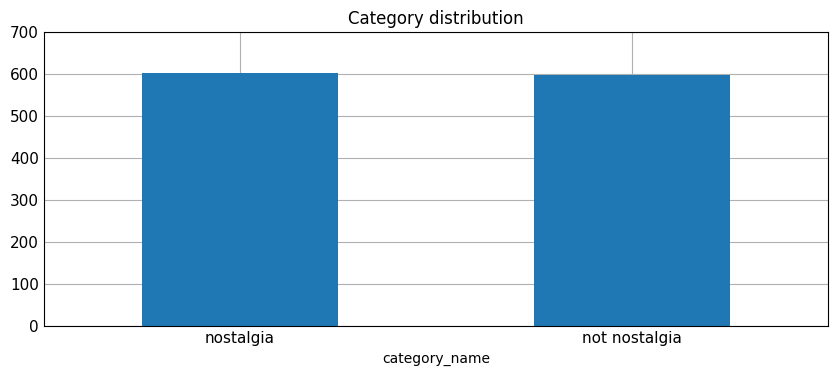

In [191]:
print(X.category_name.value_counts())
plt.style.use('_mpl-gallery')
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar', # 設定圖表為柱狀圖
                                    title = 'Category distribution',  # 設置標題
                                    ylim = [0, 700],   # 將 x 軸的標籤旋轉角度設為 0     
                                    rot = 0, fontsize = 11, figsize = (8,3))  #設置圖表大小為 8x3 英吋

category_name
nostalgia        306
not nostalgia    294
Name: count, dtype: int64
category_name
nostalgia        306
not nostalgia    294
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

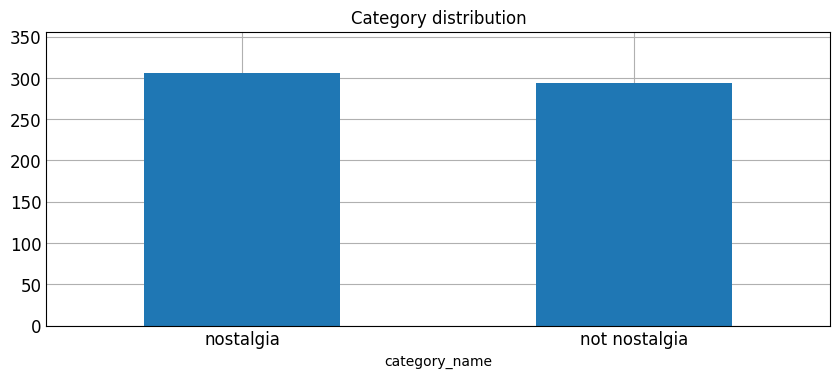

In [193]:
print(X_sample.category_name.value_counts())

upper_bound = max(X_sample.category_name.value_counts() + 50)
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

category_name
nostalgia        602
not nostalgia    596
Name: count, dtype: int64
category_name
nostalgia        306
not nostalgia    294
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

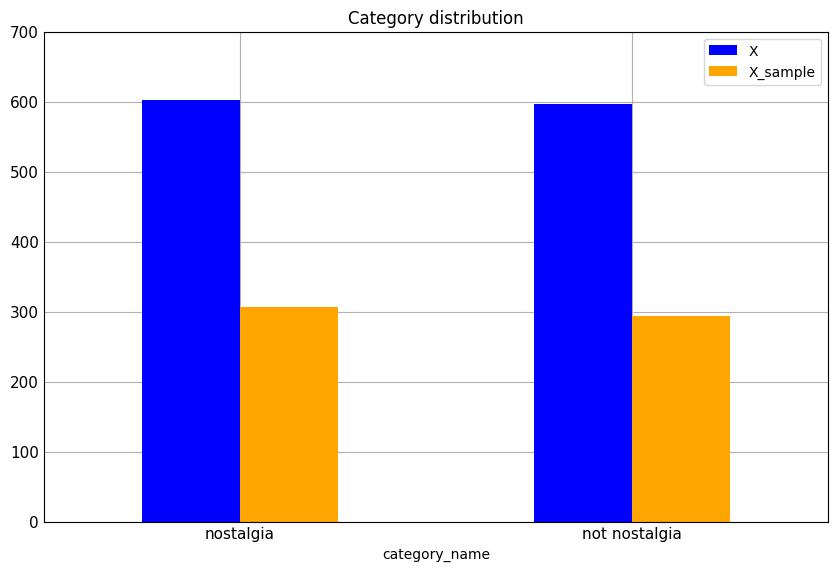

In [194]:
X_counts = X['category_name'].value_counts().sort_values(ascending=False)
print(X.category_name.value_counts())
X_sample_counts = X_sample['category_name'].value_counts().sort_values(ascending=False)
print(X_sample.category_name.value_counts())

combine = pd.DataFrame({'X': X_counts, 'X_sample': X_sample_counts})
combine = combine.sort_values(by='X', ascending=False)

combine.plot(kind='bar', 
               title='Category distribution',
               ylim=[0, 700],
               rot=0,
               fontsize=11,
               figsize=(8, 5),
               color=['blue', 'orange']
               )

In [195]:
import nltk
nltk.download('punkt')
nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [196]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [197]:
X[0:4]["unigrams"]

0    [Perception, of, death, ,, birth, ,, sorrow, ,...
1    [One, of, those, Classic, (, and, there, were,...
2     [So, many, memories, in, each, and, every, song]
3    [Was, it, in, 1968, when, Engelbert, released,...
Name: unigrams, dtype: object

In [198]:
X[0:4]

,text,category,category_name,unigrams
0,"Perception of death, birth, sorrow, suffering,...",1,not nostalgia,"[Perception, of, death, ,, birth, ,, sorrow, ,..."
1,One of those Classic (and there were so many o...,1,not nostalgia,"[One, of, those, Classic, (, and, there, were,..."
2,So many memories in each and every song,0,nostalgia,"[So, many, memories, in, each, and, every, song]"
3,Was it in 1968 when Engelbert released it? I ...,0,nostalgia,"[Was, it, in, 1968, when, Engelbert, released,..."


In [204]:
#這行程式碼的作用是將 X DataFrame 中第一行的 unigrams 欄位值轉換成列表。
list(X[0:1]['unigrams'])

[['Perception',
  'of',
  'death',
  ',',
  'birth',
  ',',
  'sorrow',
  ',',
  'suffering',
  ',',
  'old',
  'age']]

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the 'text' column into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(X.text)

vectorizer.get_feature_names_out()

print("TF-IDF 矩陣形狀:", X_tfidf.shape)  # 查看文件數和詞彙數

TF-IDF 矩陣形狀: (1198, 3327)


In [211]:
vectorizer.get_feature_names_out()[1197]

'fond'

In [213]:
analyze = vectorizer.build_analyzer()
analyze(X.text[0])

['perception', 'of', 'death', 'birth', 'sorrow', 'suffering', 'old', 'age']

In [215]:
X_tfidf.shape

(1198, 3327)

In [217]:
vectorizer.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '12', '13'],
      dtype=object)

In [218]:
X_tfidf[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [219]:
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:20]]

In [220]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [222]:
plot_z = X_tfidf[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

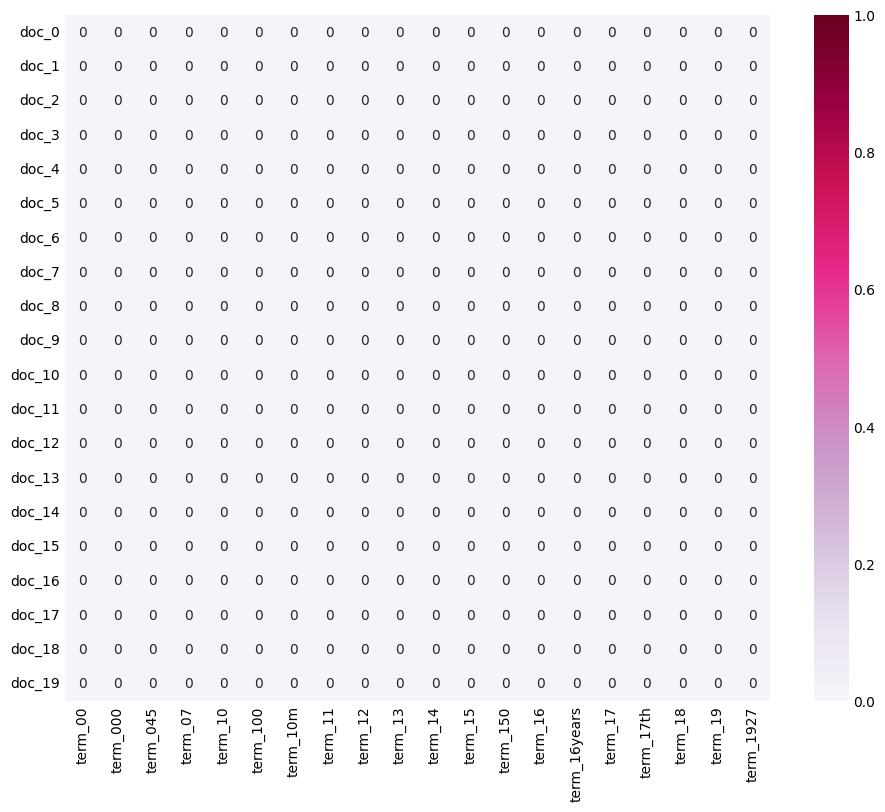

In [223]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [225]:
term_frequencies = []
for j in range(0, X_tfidf.shape[1]):
    # 計算 TF-IDF 矩陣中每個詞的總和
    term_frequencies.append(sum(X_tfidf[:, j].toarray()))

In [228]:
import numpy as np
term_frequencies = np.asarray(X_tfidf.sum(axis=0))[0]

In [229]:
term_frequencies[0]

np.float64(0.33659187250697536)

C:\Users\User\AppData\Local\Temp\ipykernel_7028\2605825305.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(vectorizer.get_feature_names_out()[:300], rotation=90)


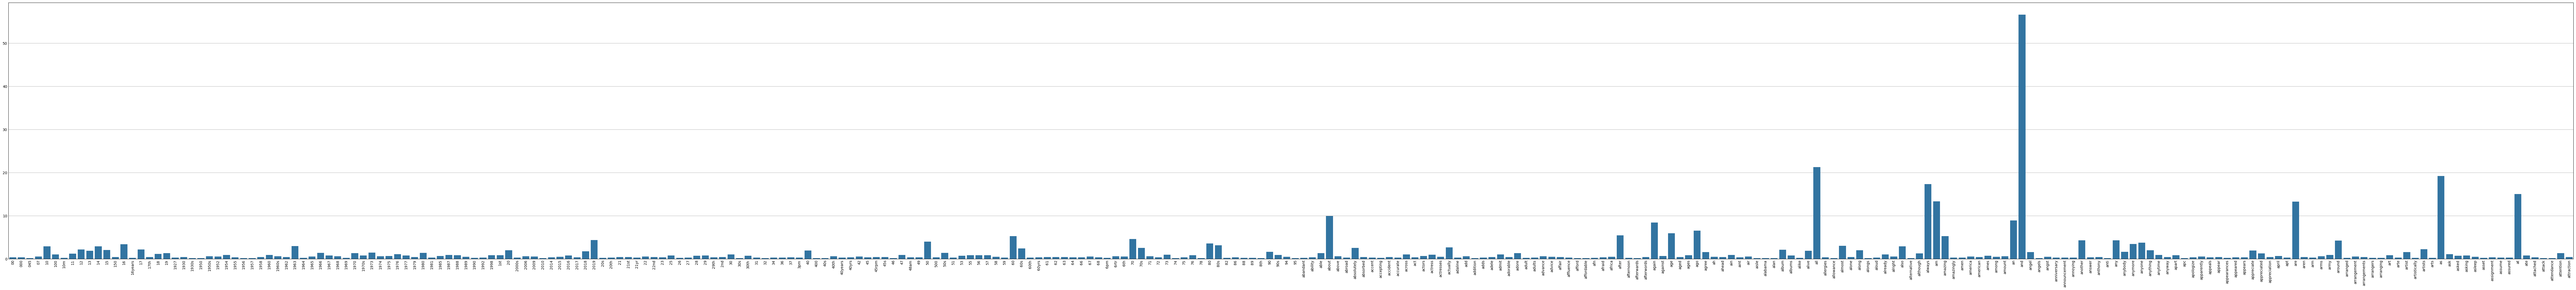

In [230]:
term_frequencies_tfidf = np.asarray(X_tfidf.sum(axis=0)).flatten()

# 設定圖表大小
plt.subplots(figsize=(100, 10))

# 繪製條形圖，x 軸為詞語（取前 300 個），y 軸為權重總和（取前 300 個）
g = sns.barplot(x=vectorizer.get_feature_names_out()[:300], 
                y=term_frequencies_tfidf[:300])

# 設置 x 軸標籤，並將標籤旋轉 90 度
g.set_xticklabels(vectorizer.get_feature_names_out()[:300], rotation=90)

# 顯示圖表
plt.show()

In [231]:
import plotly.express as px
# 計算 TF-IDF 權重總和
term_frequencies_tfidf = np.asarray(X_tfidf.sum(axis=0)).flatten()

# 準備資料，僅取前 300 個詞語和對應的 TF-IDF 權重
data = pd.DataFrame({
    'Term': vectorizer.get_feature_names_out()[:300],  # 取前 300 個詞語
    'TF-IDF Weight': term_frequencies_tfidf[:300]      # 取前 300 個權重
})

# 使用 Plotly 繪製條形圖
fig = px.bar(data, x='Term', y='TF-IDF Weight', title="Top 300 Term TF-IDF Weights")

# 設置 x 軸標籤旋轉角度
fig.update_layout(xaxis_tickangle=-90)

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# 設定要顯示的詞語數量
num_terms_to_show = 50

# 計算 TF-IDF 權重總和，並創建一個 DataFrame
term_frequencies_tfidf = np.asarray(X_tfidf.sum(axis=0)).flatten()
data = pd.DataFrame({
    'Term': vectorizer.get_feature_names_out(),
    'TF-IDF Weight': term_frequencies_tfidf
}).nlargest(num_terms_to_show, 'TF-IDF Weight')  # 取前 50 個高 TF-IDF 權重的詞語

# 使用 Plotly 繪製互動式條形圖
fig = px.bar(data, x='Term', y='TF-IDF Weight', title=f'Top {num_terms_to_show} Term TF-IDF Weights')
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤
fig.show()

In [234]:
num_terms_to_show = 50

# 計算 TF-IDF 權重總和
term_frequencies_tfidf = np.asarray(X_tfidf.sum(axis=0)).flatten()

# 生成 DataFrame，並按照 TF-IDF 權重降序排列，僅選取前 num_terms_to_show 個詞
data = pd.DataFrame({
    'Term': vectorizer.get_feature_names_out(),
    'TF-IDF Weight': term_frequencies_tfidf
}).nlargest(num_terms_to_show, 'TF-IDF Weight')  # 取前 50 個高 TF-IDF 權重的詞語

# 使用 Plotly Express 繪製長尾分布圖
fig = px.line(data, x='Term', y='TF-IDF Weight', title=f'Top {num_terms_to_show} Term TF-IDF Weights - Long Tail Distribution')

fig.update_traces(mode='lines+markers', fill='tozeroy')  # 填充下方區域
fig.update_layout(xaxis_tickangle=-90)  # x 軸標籤旋轉 -90 度

# 顯示圖表
fig.show()

In [237]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create TF-IDF term-document DataFrame for each category
def create_term_document_df(df):
    tfidf_vect = TfidfVectorizer()  # Initialize the TfidfVectorizer
    X_tfidf = tfidf_vect.fit_transform(df['text'])  # Transform the text data into TF-IDF weighted counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = tfidf_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_tfidf.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



In [238]:
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,12,13,14,15,16,17,18,...,you,young,younger,youngster,your,yours,youth,youtube,yrs,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202012,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.282601,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.247221,0.0,0.0,0.0


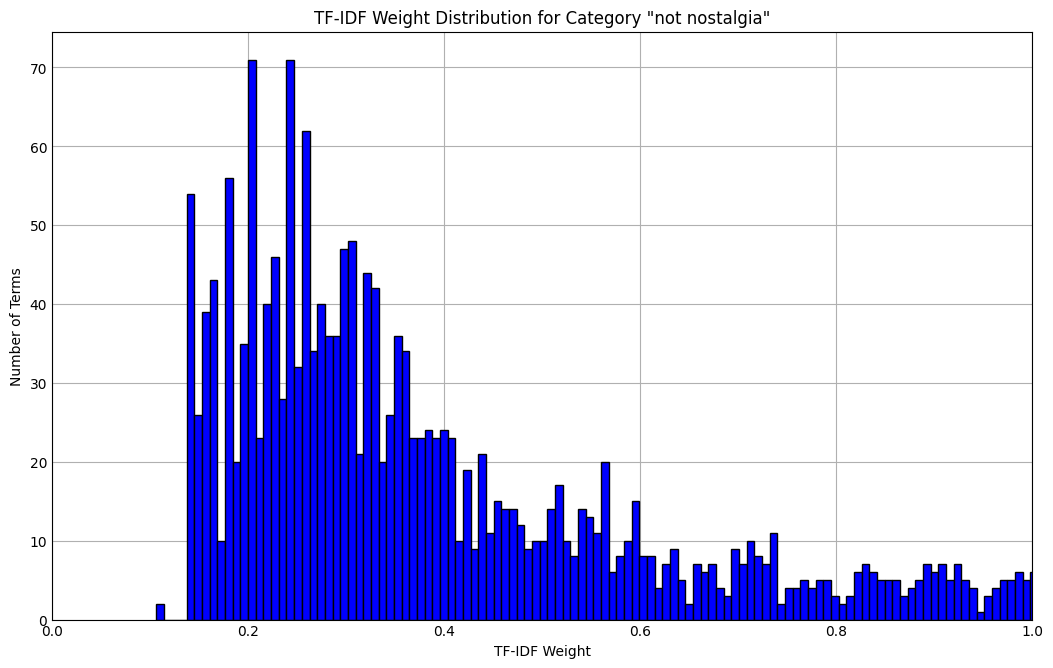

In [240]:
category_number = 0  # 可將其變更為0到1中的任意一個
selected_category = categories[category_number]  # 取得對應的類別名稱

# 取出指定類別的 TF-IDF 權重矩陣，並計算每個詞的權重總和
tfidf_word_counts = term_document_dfs[selected_category].sum(axis=0).to_numpy()

# 視覺化 TF-IDF 權重的分布
plt.figure(figsize=(10, 6))
plt.hist(tfidf_word_counts, bins=5000, color='blue', edgecolor='black')

# 設置圖表標題和軸標籤
plt.title(f'TF-IDF Weight Distribution for Category "{selected_category}"')
plt.xlabel('TF-IDF Weight')
plt.ylabel('Number of Terms')
plt.xlim(0, 1)  # 可視情況調整 x 軸範圍以適合 TF-IDF 權重範圍
plt.show()

In [248]:
category_number = 0
selected_category = categories[category_number]
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(category_dfs[selected_category]['text'])

# 計算每個詞語的 TF-IDF 總權重
word_weights = X_tfidf.sum(axis=0).A1  # .A1 轉換為一維 NumPy 陣列

# 將權重按降序排列，並取出前 5% 的詞語
sorted_weights = np.sort(word_weights)[::-1]
top_5_percent_index = int(0.05 * len(sorted_weights))

# 取出前 5% 高權重詞的索引位置
top_5_percent_indices = np.argsort(word_weights)[-top_5_percent_index:]

# 篩選出高權重詞並列印
filtered_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {selected_category}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 114
Filtered terms: ['loved', 'better', 'years', 'heart', 'why', 'day', 'here', 'those', 'man', 'make', 'its', 'too', 'real', 'do', 'classic', 'today', 'an', 'some', 'singer', 'world', 'heard', 'up', 'think', 'such', 'listening', 'most', 'video', 'had', 'your', 'sing', 'get', 'people', 'him', 'nice', 'don', 'still', 'by', 'many', 'would', 'listen', 'out', 'these', 'has', 'hear', 'version', 'more', 'if', 'very', 'much', 'about', 'really', 'now', 'there', 'thank', 'am', 'know', 'old', 'only', 'who', 'how', 'could', 'never', 'we', 'from', 'at', 'good', 'his', 'are', 'best', 'no', 'they', 'ever', 'always', 'her', 'when', 'she', 'will', 'time', 'songs', 'be', 'just', 'voice', 'on', 'all', 'as', 'what', 'beautiful', 'but', 'with', 'not', 'me', 'can', 'great', 'one', 'he', 'have', 'like', 'for', 'so', 'was', 'music', 'love', 'my', 'that', 'in', 'you', 'is', 'it', 'of', 'to', 'song', 'and', 'this', 'the']


In [247]:
category_number = 1
selected_category = categories[category_number]
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(category_dfs[selected_category]['text'])

# 計算每個詞語的 TF-IDF 總權重
word_weights = X_tfidf.sum(axis=0).A1  # .A1 轉換為一維 NumPy 陣列

# 將權重按降序排列，並取出前 5% 的詞語
sorted_weights = np.sort(word_weights)[::-1]
top_5_percent_index = int(0.05 * len(sorted_weights))

# 取出前 5% 高權重詞的索引位置
top_5_percent_indices = np.argsort(word_weights)[-top_5_percent_index:]

# 篩選出高權重詞並列印
filtered_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {selected_category}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 104
Filtered terms: ['wonderful', 'out', 'child', 'radio', 'wish', 'again', 'him', 'can', 'some', 'mum', 'mom', 'makes', 'be', 'then', 'voice', 'are', 'really', 'never', 'sing', 'bring', 'life', 'how', 'thanks', 'what', 'heard', 'they', 'one', 'played', 'hear', 'he', 'takes', 'his', 'have', 'listen', 'am', 'up', 'every', 'like', 'these', 'happy', 'used', 'were', 'school', 'first', 'best', 'thank', 'very', 'young', 'her', 'at', 'she', 'had', 'loved', 'still', 'dad', 'times', 'just', 'always', 'we', 'now', 'those', 'as', 'but', 'much', 'songs', 'listening', 'from', 'many', 'all', 'miss', 'with', 'is', 'good', 'remember', 'music', 'that', 'beautiful', 'days', 'reminds', 'on', 'for', 'old', 'great', 'childhood', 'time', 'years', 'you', 'love', 'brings', 'so', 'when', 'in', 'it', 'memories', 'back', 'of', 'me', 'was', 'and', 'song', 'this', 'to', 'my', 'the']


In [249]:
category_number = 0  

# 計算該類別的詞-文件矩陣的詞語權重總和，這裡的 word_counts 即為每個詞語的權重總和
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# 取得排序索引，根據權重從小到大排序
sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]  # 按照權重排序

# 計算權重最低的 1% 詞語的索引
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# 取得底部 1% 的詞語索引
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# 根據索引篩選出權重最低的 1% 詞語
filtered_words = [vectorizer.get_feature_names_out()[i] for i in bottom_1_percent_indices]

# 印出類別名稱、底部 1% 詞語的數量，以及這些詞語
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['confessing', 'feedback', 'connect', 'congratulation', 'at', 'dancing', 'handedly', 'el', 'american', 'invest', 'enthusiastic', 'bought', '73', 'considered', 'hugs', 'industry', '2006', 'burn', 'crematorium', 'favourite', 'assume', 'pay']


In [250]:
category_number = 1  

# 計算該類別的詞-文件矩陣的詞語權重總和，這裡的 word_counts 即為每個詞語的權重總和
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# 取得排序索引，根據權重從小到大排序
sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]  # 按照權重排序

# 計算權重最低的 1% 詞語的索引
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# 取得底部 1% 的詞語索引
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# 根據索引篩選出權重最低的 1% 詞語
filtered_words = [vectorizer.get_feature_names_out()[i] for i in bottom_1_percent_indices]

# 印出類別名稱、底部 1% 詞語的數量，以及這些詞語
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 20
Filtered terms: ['earnings', 'martin', 'beaten', 'any', 'incurable', 'charismatic', 'actually', 'expressions', 'correctly', 'cooler', 'concert', 'engelbert', 'half', 'charting', 'ability', 'ended', 'beautiful', 'comforting', 'cheap', 'haired']


In [252]:
category_number = 0  
# 定義函數：根據每個詞在文件中的權重總和，篩選出前 5% 和底部 1% 詞彙
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # 計算每個詞在所有文件中的總權重（TF-IDF）
    word_sums = term_document_df.sum(axis=0)
    
    # 根據權重進行升序排序
    sorted_words = word_sums.sort_values()
    
    # 計算需要移除的高頻和低頻詞的數量
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # 獲取底部 1% 和頂部 5% 詞語的名稱，將其標記為要移除
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # 從 DataFrame 中刪除這些詞語，並返回新的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# 初始化字典以存儲篩選後的每個類別的詞-文件頻率 DataFrame
filtered_term_document_dfs = {}

for category in categories:
    # 對每個類別的 DataFrame 應用篩選函數
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])

# 更新 term_document_dfs 字典為篩選後的 DataFrames
term_document_dfs = filtered_term_document_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
print(filtered_term_document_dfs[categories[category_number]])

Filtered Term-Document Frequency DataFrame for Category not nostalgia:
      00  000  045   10       100  10m   11   12   14   15  ...  yet  younger  \
0    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
1    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
2    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
3    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
4    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
..   ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...      ...   
591  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
592  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
593  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
594  0.0  0.0  0.0  0.0  0.135687  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
595  0.0  0.0  0.0  0.0  0.000000  0.0

In [253]:
category_number = 1  
# 定義函數：根據每個詞在文件中的權重總和，篩選出前 5% 和底部 1% 詞彙
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # 計算每個詞在所有文件中的總權重（TF-IDF）
    word_sums = term_document_df.sum(axis=0)
    
    # 根據權重進行升序排序
    sorted_words = word_sums.sort_values()
    
    # 計算需要移除的高頻和低頻詞的數量
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # 獲取底部 1% 和頂部 5% 詞語的名稱，將其標記為要移除
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # 從 DataFrame 中刪除這些詞語，並返回新的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# 初始化字典以存儲篩選後的每個類別的詞-文件頻率 DataFrame
filtered_term_document_dfs = {}

for category in categories:
    # 對每個類別的 DataFrame 應用篩選函數
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])

# 更新 term_document_dfs 字典為篩選後的 DataFrames
term_document_dfs = filtered_term_document_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
print(filtered_term_document_dfs[categories[category_number]])

Filtered Term-Document Frequency DataFrame for Category nostalgia:
      07   11   12   15   17   18   19  1927  1950s  1952  ...  yeas  yeh  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...   ...    ...   ...  ...   ...  ...   
597  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
598  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
599  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
600  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   
601  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...   0.0  0.0   

     yes

In [279]:
import pandas as pd

# 定義函數來生成交易格式資料庫
def create_transactional_database(term_document_df, output_file):
    # 將每個文檔中非零詞彙的位置提取為交易
    transactions = []
    for index, row in term_document_df.iterrows():
        transaction = [term for term, value in row.items() if value > 0]
        transactions.append(transaction)
    
    # 將交易資料寫入 CSV 檔
    with open(output_file, 'w') as f:
        for transaction in transactions:
            f.write(",".join(transaction) + "\n")

# 對每個類別生成交易格式資料庫
for category in term_document_dfs:
    output_file = f"transactional_db_{category}.csv"
    create_transactional_database(term_document_dfs[category], output_file)
    print(f"已生成交易資料庫：{output_file}")

已生成交易資料庫：transactional_db_not nostalgia.csv
已生成交易資料庫：transactional_db_nostalgia.csv
